# <center style = 'color : white'>**RECEIVE A LOAN FROM THE BANK**</center>

In [1]:
import pandas as pd
import numpy as np

## <center>**Data preprocessing**</center>

In [3]:
# loading the dataset
db = pd.read_csv("german.csv", names = ['status of existing checking account','Duration in months','Credit History','Purpose','Credit Amount','Savings account/bonds','Present employement since','installement rate in percentage of disposable income','Personal status and sex','other debtors/guarantors','present residence since','Property','Age in years','other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'label'])
db.head()

,status of existing checking account,Duration in months,Credit History,Purpose,Credit Amount,Savings account/bonds,Present employement since,installement rate in percentage of disposable income,Personal status and sex,other debtors/guarantors,...,Property,Age in years,other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
db['status of existing checking account'].value_counts()

A14    394
A11    274
A12    269
A13     63
Name: status of existing checking account, dtype: int64

In [ ]:
# display some information about dataset
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   status of existing checking account                       1000 non-null   object
 1   Duration in months                                        1000 non-null   int64 
 2   Credit History                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit Amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employement since                                 1000 non-null   object
 7   installement rate in percentage of disposable income      1000 non-null   int64 
 8   Personal status and sex      

In [ ]:
# making statistics of all numeric data in the dataset
db.describe()

,Duration in months,Credit Amount,installement rate in percentage of disposable income,present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
# check the null values
db.isnull().sum() # db.isna().sum()

status of existing checking account                         0
Duration in months                                          0
Credit History                                              0
Purpose                                                     0
Credit Amount                                               0
Savings account/bonds                                       0
Present employement since                                   0
installement rate in percentage of disposable income        0
Personal status and sex                                     0
other debtors/guarantors                                    0
present residence since                                     0
Property                                                    0
Age in years                                                0
other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [ ]:
# check the duplicates
db.duplicated().sum()

0

In [ ]:
from sklearn.feature_selection import RFE


#### <center> **Data transformation** </center>

In [52]:
db['Personal status and sex'] = db['Personal status and sex'].replace(['A93', 'A92', 'A91', 'A94'], [0, 1, 2, 3])
db['foreign worker'] = db['foreign worker'].replace(['A201', 'A202'], [1, 0])
db['Savings account/bonds'] = db['Savings account/bonds'].replace(['A61', 'A62', 'A63', 'A64', 'A65'], [1, 2, 3, 4, 0])
db['status of existing checking account'] = db['status of existing checking account'].replace(['A11', 'A12', 'A13', 'A14'], [1, 2, 3, 4])

In [53]:
# specify the data we need to train the model
X = db[['status of existing checking account', "Duration in months", "Credit Amount", 'Savings account/bonds', "installement rate in percentage of disposable income", 'Personal status and sex', "present residence since", "Age in years", "Number of existing credits at this bank", "Number of people being liable to provide maintenance for", 'foreign worker']]
Y = db['label']

#### <center> **Data normalisation** </center>

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

## <center>**Data visualization**</center>

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


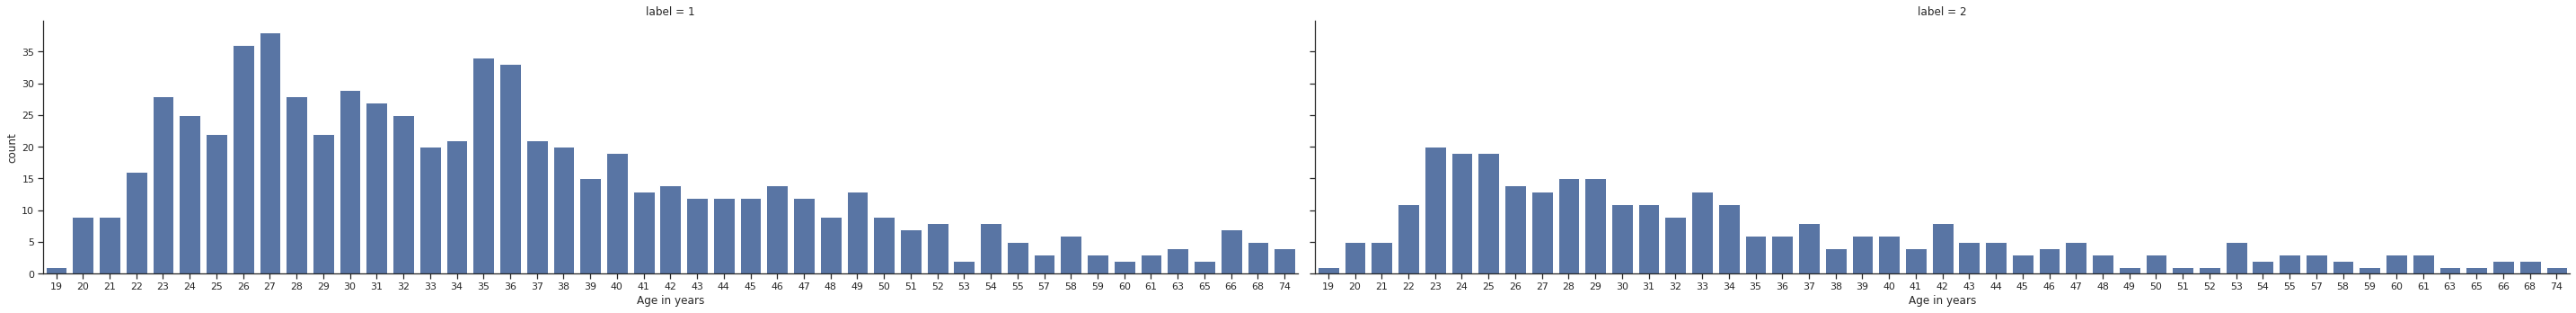

In [ ]:
graph = sns.FacetGrid(db, col = 'label', aspect=4, height=5)
graph.map(sns.countplot, 'Age in years')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


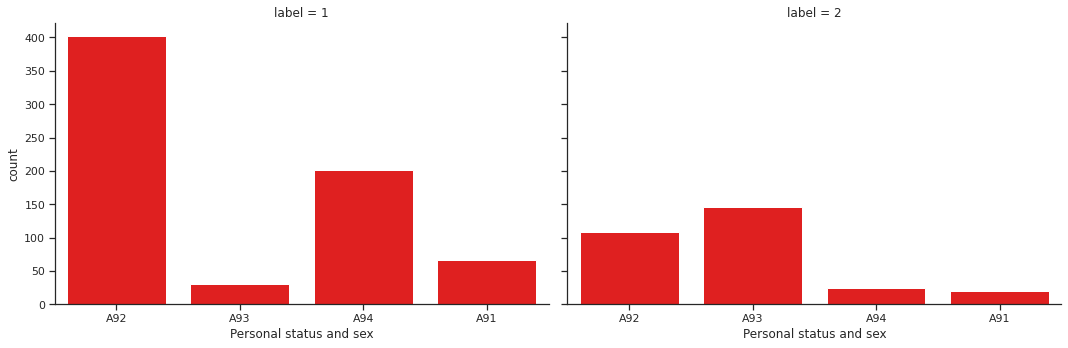

In [ ]:
graph = sns.FacetGrid(db, col = 'label', aspect=1.5, height=5)
graph.map(sns.countplot, 'Personal status and sex', color = 'red')

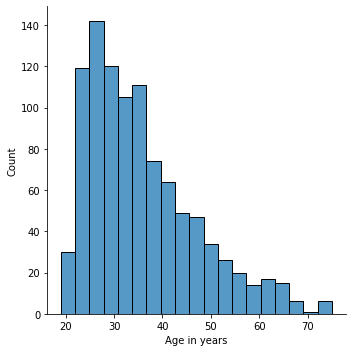

In [ ]:
sns.displot(db['Age in years'])

<Axes: xlabel='Personal status and sex', ylabel='count'>

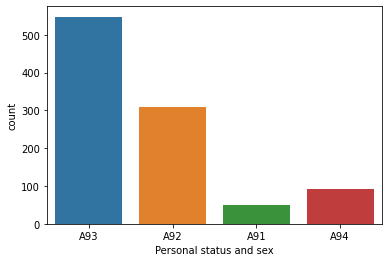

In [ ]:
sns.countplot(x = 'Personal status and sex', data = db)

<Axes: xlabel='label', ylabel='count'>

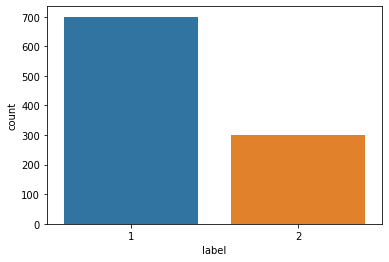

In [ ]:
sns.countplot(x = 'label', data = db)

## <center>**Machine learning model**</center>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

In [90]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 11)
(200, 11)
(800,)
(200,)


In [91]:
models = {
    'LogisticRegression' : LogisticRegression(random_state = 25),
    'GaussianNBS' : GaussianNB(),
    'SVC' : SVC(kernel='rbf', probability=False)
}

In [92]:
from sklearn.metrics import precision_score, recall_score , accuracy_score, confusion_matrix

def metrics(y_true, y_predict, retur = False):
    pre = precision_score(y_true, y_predict, average = 'macro')
    rec = recall_score(y_true, y_predict, average = 'macro')
    accuracy = accuracy_score(y_true, y_predict)
    if retur :
      return pre, rec, accuracy_score
    else:
      print('precision : ', pre)
      print('recall : ', rec)
      print('accuracy : ', accuracy)

In [93]:
def train_and_evaluate(models, x, y):
  for name, model in models.items():
    print(name, ':')
    model.fit(x,y)
    metrics(y, model.predict(x))
    print("*" * 30)

In [94]:
train_and_evaluate(models,x_train, y_train)

LogisticRegression :
precision :  0.7164963470933621
recall :  0.6448014329503639
accuracy :  0.75625
******************************
GaussianNBS :
precision :  0.6858376233376233
recall :  0.7077778027594788
accuracy :  0.72625
******************************
SVC :
precision :  0.7559537140724151
recall :  0.6284746423244973
accuracy :  0.7625
******************************


In [111]:
# building the model we chose to make predictions
model = LogisticRegression(random_state = 25)
model.fit(x_train, y_train)
model.score(x_train, y_train) # coefficient of determination R**2
model.predict(x_test)

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1])

In [116]:
def cross_validation_kfold(models, x, y, k):
  cross_val = KFold(k)
  for name, model in models.items():
    print(name, ':')
    scores = cross_val_score(model , x , y , cv = cross_val) # score for each iteration
    for i, v in enumerate(scores):
      print(f"Score of test part {i} : {v}")
    print("*"*50)

In [117]:
cross_validation_kfold(models, X, Y, 5)

LogisticRegression :
Score of test part 0 : 0.745
Score of test part 1 : 0.765
Score of test part 2 : 0.725
Score of test part 3 : 0.715
Score of test part 4 : 0.725
**************************************************
GaussianNBS :
Score of test part 0 : 0.73
Score of test part 1 : 0.675
Score of test part 2 : 0.705
Score of test part 3 : 0.715
Score of test part 4 : 0.65
**************************************************
SVC :
Score of test part 0 : 0.765
Score of test part 1 : 0.755
Score of test part 2 : 0.7
Score of test part 3 : 0.72
Score of test part 4 : 0.71
**************************************************


## <center>**Balance data**</center>

In [ ]:
# Random undersampling to balance the classes
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over_ru, y_over_ru = undersample.fit_resample(X, Y)

In [ ]:
# NearMiss undersampling to balance the classes
from imblearn.under_sampling import NearMiss
undrsample = NearMiss(version = 2, n_neighbors=3)
X_over_nm, y_over_nm = undersample.fit_resample(X, Y)

In [ ]:
# ClusterCentroids undersampling to balance the classes
from imblearn.under_sampling import ClusterCentroids
undersample = ClusterCentroids(sampling_strategy='auto')
X_over_cc, y_over_cc = undersample.fit_resample(X, Y)

In [120]:
cross_validation_kfold(models, X_over_nm, y_over_nm, 5)

LogisticRegression :
Score of test part 0 : 0.5
Score of test part 1 : 0.49166666666666664
Score of test part 2 : 0.6833333333333333
Score of test part 3 : 0.525
Score of test part 4 : 0.5
**************************************************
GaussianNBS :
Score of test part 0 : 0.5333333333333333
Score of test part 1 : 0.5
Score of test part 2 : 0.6583333333333333
Score of test part 3 : 0.575
Score of test part 4 : 0.6916666666666667
**************************************************
SVC :


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Score of test part 0 : 0.0
Score of test part 1 : 0.0
Score of test part 2 : 0.6
Score of test part 3 : 0.21666666666666667
Score of test part 4 : 0.16666666666666666
**************************************************
